# NLP - Project 1
## Rinehart Analysis
**Team**: *Jean Merlet, Konstantinos Georgiou, Matt Lane*

Check out the **[README](https://github.com/NLPaladins/rinehartAnalysis/blob/main/README.md)**


Or the current **[TODO](https://github.com/NLPaladins/rinehartAnalysis/blob/main/TODO.md)** list.

In [1]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [2]:
# Clone the repository if you're in Google Collab
def clone_project(is_collab: bool = False):
    print("Cloning Project..")
    !git clone https://github.com/NLPaladins/rinehartAnalysis.git
    print("Project cloned.")
       
print("Clone project?")
print("(If you do this you will ovewrite local changes on other files e.g. configs)")
print("Not needed if you're not on Google Collab")
btn = widgets.Button(description="Yes, clone")
btn.on_click(clone_project)
display(btn)

Clone project?
(If you do this you will ovewrite local changes on other files e.g. configs)
Not needed if you're not on Google Collab


Button(description='Yes, clone', style=ButtonStyle())

In [3]:
# Clone the repository if you're in Google Collab
def change_dir(is_collab: bool = False):
    try:
        print("Changing dir..")
        os.chdir('/content/rinehartAnalysis')
        print('done')
        print("Current dir:")
        print(os.getcwd())
        print("Dir Contents:")
        print(os.listdir())
    except Exception:
        print("Error: Project not cloned")
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

### At any point, to save changes
click **File > Save a copy on Gihtub**

### Now go to files on the left, and open:
- rinehartAnalysis/confs/proj_1.yml

(Ctr+s) to save changes

## Load Libraries and setup

### Libraries Overview
All the libraries are located under *"\<project root>/nlp_libs"*
- ***ProcessedBook***: Loc: **books/processed_book.py**, Desc: *Book Pre-processor*
- ***Configuration***: Loc: **configuration/configuration.py**, Desc: *Configuration Loader*
- ***ColorizedLogger***: Loc: **fancy_logger/colorized_logger.py**, Desc: *Logger with formatted text capabilities*

In [4]:
# Imports
%load_ext autoreload
%autoreload 2
import traceback
import argparse
import re
from importlib import reload as reload_lib
from pprint import pprint
import numpy as np

# Custom libs
from nlp_libs import Configuration, ColorizedLogger

In [5]:
# The path of configuration and log save path
config_path = "confs/proj_1.yml"  # Open files > confs > proj_1.yml to edit temporalily. Commit to save permanently
# !cat "$config_path"
log_path = "logs/proj_1.log"  # Open files > logs > proj_1.log to debug logs of previous runs
# The logger
logger = ColorizedLogger(logger_name='Notebook', color='cyan')
ColorizedLogger.setup_logger(log_path=log_path, debug=False, clear_log=True)
# Load the configuration
conf = Configuration(config_src=config_path)
# Get the books dict
books = conf.get_config('data_loader')['config']['books']
# pprint(books)  # Pretty print the books dict

2021-09-26 21:20:55 FancyLogger  INFO     Logger is set. Log file path: /home/drkostas/GDrive/Projects/UTK/rinehartAnalysis/logs/proj_1.log
2021-09-26 21:20:55 Config       INFO     Configuration file loaded successfully from path: /home/drkostas/GDrive/Projects/UTK/rinehartAnalysis/confs/proj_1.yml
2021-09-26 21:20:55 Config       INFO     Configuration Tag: proj1


# Analysis Functions

In [6]:
import nlp_libs.books.processed_book as proc
import nlp_libs.books.book_extractor as extr

# Plotting Functions

In [7]:
import nlp_libs.books.plotter as pl

# Circular Staircase - Analysis

In [8]:
title, metadata = list(books.items())[0]
book = proc.ProcessedBook(title=title, metadata=metadata)

In [9]:
suspects_, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)

In [10]:
suspects = extr.get_earliest_chapter_sentence_from_name_lists(book, suspects_, 3, first=True)
perp = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=True)
dets = extr.get_earliest_chapter_sentence_from_name_lists(book, dets, 3, first=True)
co_ocs = extr.get_co_occurence(book, co_ocs, n_sents=2)

## Get Crime Mentions, Details
Link the first mention with the next close mentions

In [11]:
# Get mentions
crime_words = ['killed', 'shot']
p_lookaheads = None#['“']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=0,
                                           right_margin=2,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Paragraph {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Paragraph {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-26 21:20:57 Book Extractor INFO     Regex: (^.*(?:.*\s(?:killed|shot).*)$)

2021-09-26 21:20:58 Notebook     INFO     First mention: Chapter: 2, Sentence: 68
2021-09-26 21:20:58 Notebook     INFO     At three oclock in the morning I was roused by a revolver shot
2021-09-26 21:20:58 Notebook     INFO     Crime Details Location: 
2021-09-26 21:20:58 Notebook     INFO     First Instace: Paragraph 2, Sentence 68
2021-09-26 21:20:58 Notebook     INFO     Last Instace: Paragraph 2, Sentence 73
2021-09-26 21:20:58 Notebook     INFO     Crime Details: 
2021-09-26 21:20:58 Notebook     INFO     
At three oclock in the morning I was roused by a revolver shot. The sound seemed to come from just outside my door. For a moment I could not move. Then—I heard Gertrude stirring in her room, and the next moment she had thrown open the connecting door. “O Aunt Ray! Aunt Ray!” she cried hysterically. “Some one has been killed, killed. “Thieves,” I said shortly. “Thank goodness, there are some men 

### Get Crime Type

In [12]:
# Get mentions
crime_words = ['fired']
p_lookaheads = ['bullet']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=1,
                                           right_margin=2,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Paragraph {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Paragraph {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-26 21:20:58 Book Extractor INFO     Regex: (^.*(?=bullet)(?:.*\s(?:fired).*)$)

2021-09-26 21:20:58 Notebook     INFO     First mention: Chapter: 4, Sentence: 49
2021-09-26 21:20:58 Notebook     INFO     The bullet was fired at close range, entered below the shoulder and came out, after passing through the heart, well down the back
2021-09-26 21:20:58 Notebook     INFO     Crime Details Location: 
2021-09-26 21:20:58 Notebook     INFO     First Instace: Paragraph 4, Sentence 49
2021-09-26 21:20:58 Notebook     INFO     Last Instace: Paragraph 4, Sentence 49
2021-09-26 21:20:58 Notebook     INFO     Crime Details: 
2021-09-26 21:20:58 Notebook     INFO     
In the first place, Mr. Armstrong was shot from above. The bullet was fired at close range, entered below the shoulder and came out, after passing through the heart, well down the back. In other words, I believe the murderer stood on the stairs and fired down. In the second place, I found on the edge of the billiard-table a c

# Circular Staircase - Plotting

In [13]:
locs, labels, colors = pl.create_locs_labels(book, suspects, perp, dets, co_ocs, crime)

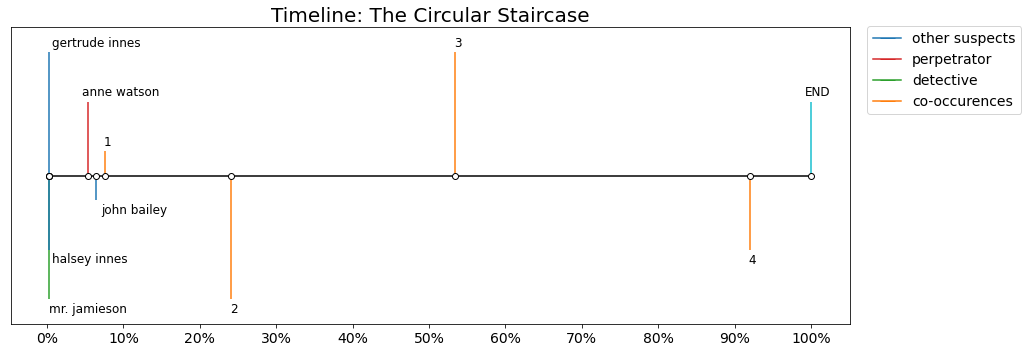

In [14]:
pl.make_timeline(book, locs, labels, colors)

# The Man in the Lower Ten - Analysis

In [15]:
title, metadata = list(books.items())[1]
book = proc.ProcessedBook(title=title, metadata=metadata)

In [16]:
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)

In [17]:
suspects = extr.get_earliest_chapter_sentence_from_name_lists(book, suspects, 3, first=True)
perp = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=True)
dets = extr.get_earliest_chapter_sentence_from_name_lists(book, dets, 3, first=True)
co_ocs = extr.get_co_occurence(book, co_ocs, n_sents=2)

## Get Crime Mentions, Details
Link the first mention with the next close mentions

In [18]:
# Get Mentions
crime_words = ['body']
p_lookaheads = None#['“']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=1,
                                           right_margin=2,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Paragraph {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Paragraph {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-26 21:21:00 Book Extractor INFO     Regex: (^.*(?:.*\s(?:body).*)$)

2021-09-26 21:21:00 Notebook     INFO     First mention: Chapter: 1, Sentence: 116
2021-09-26 21:21:00 Notebook     INFO     Then, without the slightest warning, as the train rounded a curve, a heavy body was thrown into my berth
2021-09-26 21:21:00 Notebook     INFO     Crime Details Location: 
2021-09-26 21:21:00 Notebook     INFO     First Instace: Paragraph 1, Sentence 116
2021-09-26 21:21:00 Notebook     INFO     Last Instace: Paragraph 1, Sentence 116
2021-09-26 21:21:00 Notebook     INFO     Crime Details: 
2021-09-26 21:21:00 Notebook     INFO     
Every nerve was tense: time passed, perhaps ten minutes, possibly half an hour. Then, without the slightest warning, as the train rounded a curve, a heavy body was thrown into my berth. The incident, trivial as it seemed, was startling in its suddenness, for although my ears were painfully strained and awake, I had heard no step outside. The next instant the

## Get Crime Type

In [19]:
# Get Mentions
crime_words = ['stabbed']
p_lookaheads = ['body']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=1,
                                           right_margin=2,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Paragraph {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Paragraph {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-26 21:21:00 Book Extractor INFO     Regex: (^.*(?=body)(?:.*\s(?:stabbed).*)$)

2021-09-26 21:21:00 Notebook     INFO     First mention: Chapter: 12, Sentence: 113
2021-09-26 21:21:00 Notebook     INFO     Shortly before the collision, John Flanders, the conductor of the Flier, sent this telegram to the chief of police: “Body of Simon Harrington found stabbed in his berth, lower ten, Ontario, at six-thirty this morning
2021-09-26 21:21:00 Notebook     INFO     Crime Details Location: 
2021-09-26 21:21:00 Notebook     INFO     First Instace: Paragraph 12, Sentence 113
2021-09-26 21:21:00 Notebook     INFO     Last Instace: Paragraph 12, Sentence 113
2021-09-26 21:21:00 Notebook     INFO     Crime Details: 
2021-09-26 21:21:00 Notebook     INFO     
It has transpired that Simon Harrington, the Wood Street merchant of that city, was not killed in the wreck, but was murdered in his berth the night preceding the accident. Shortly before the collision, John Flanders, the conductor of

# The Man in the Lower Ten - Plotting

In [21]:
locs, labels, colors = pl.create_locs_labels(book, suspects, perp, dets, co_ocs, crime)

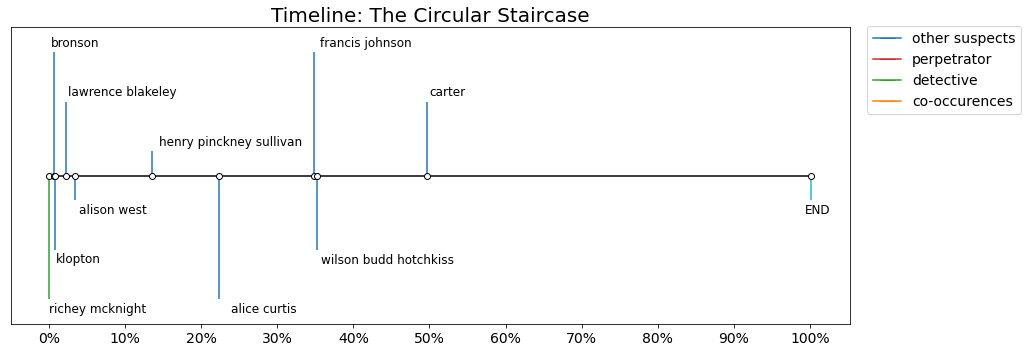

In [22]:
pl.make_timeline(book, locs, labels, colors)

# The After House - Analysis

In [27]:
title, metadata = list(books.items())[2]
book = proc.ProcessedBook(title=title, metadata=metadata) 

other_suspects = []

dets_perp = []

In [29]:
suspects = extr.get_earliest_chapter_sentence_from_name_lists(book, other_suspects, 3, first=True)
suspects

{}

In [30]:
perp = extr.get_earliest_chapter_sentence_from_name_lists(book, [dets_perp[1]], 3, first=True)
perp

IndexError: list index out of range

In [ ]:
dets_list = [[alias for alias in dets_perp[0] if alias != 'detective']]
dets = eget_earliest_chapter_sentence_from_name_lists(book, dets_list, 3, first=True)
dets

In [ ]:
co_ocs = get_co_occurence(book, dets_perp, n_sents=2)

# The After House - Plotting

In [ ]:
title, metadata = list(books.items())[2]
book = ProcessedBook(title=title, metadata=metadata) 

other_suspects = []

dets_perp = []

# The Case of Jennifer Bryce - Analysis

In [ ]:
title, metadata = list(books.items())[2]
book = ProcessedBook(title=title, metadata=metadata) 

other_suspects = []

dets_perp = []

In [ ]:
suspects = get_earliest_chapter_sentence_from_name_lists(book, other_suspects, 3, first=True)
suspects

In [ ]:
perp = get_earliest_chapter_sentence_from_name_lists(book, [dets_perp[1]], 3, first=True)
perp

In [ ]:
dets_list = [[alias for alias in dets_perp[0] if alias != 'detective']]
dets = get_earliest_chapter_sentence_from_name_lists(book, dets_list, 3, first=True)
dets

In [ ]:
co_ocs = get_co_occurence(book, dets_perp, n_sents=2)

# The Case of Jennifer Bryce - Plotting

# K - Analysis

In [ ]:
# Load Circlular Staircase example
title, metadata = list(books.items())[0]
book = ProcessedBook(title=title, metadata=metadata) 

other_suspects = [['gertrude innes', 'miss gertrude innes', 'miss gertrude', 'gertrude', 'miss innes', 'mis’ innes'],
                  ['john bailey', 'jack bailey', 'mr. bailey', 'bailey', 'alex', 'alexander graham'],
                  ['halsey innes', 'mr. halsey', 'halsey', 'mr. innes']]

dets_perp = [['mr. jamieson', 'mr. winters', 'detective', 'jamieson', 'winters'],
             ['anne watson', 'mrs. watson', 'mis’ watson']]

In [ ]:
suspects = get_earliest_chapter_sentence_from_name_lists(book, other_suspects, 3, first=True)
suspects

In [ ]:
perp = get_earliest_chapter_sentence_from_name_lists(book, [dets_perp[1]], 3, first=True)
perp

In [ ]:
dets_list = [[alias for alias in dets_perp[0] if alias != 'detective']]
dets = get_earliest_chapter_sentence_from_name_lists(book, dets_list, 3, first=True)
dets

In [ ]:
co_ocs = get_co_occurence(book, dets_perp, n_sents=2)

# K - Plotting